<a href="https://colab.research.google.com/github/vdadithya2002/Opencv/blob/main/Hough_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##hough

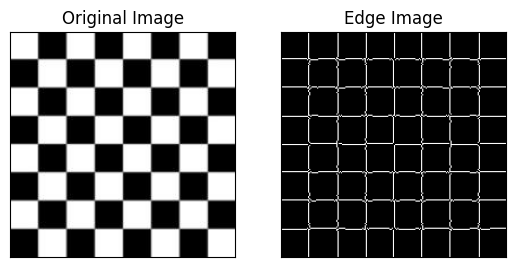

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('chessboards_GRAY.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

##Harris corner detection

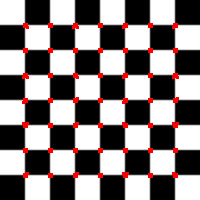

In [4]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

filename = 'chessboards_GRAY.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)


#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)



# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

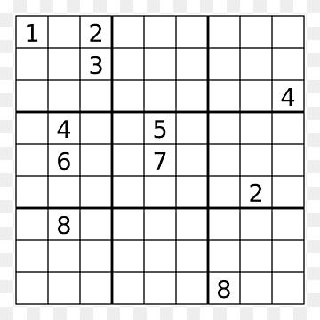

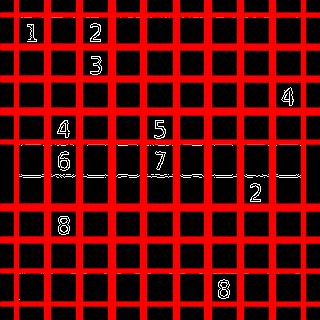

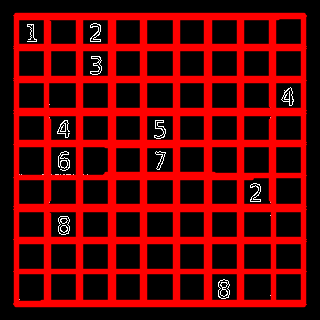

In [7]:
import sys
import math
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
def main(argv):

    # default_file = 'sudoku.png'
    default_file='sudoku.jpg'
    filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    src = cv.imread(default_file, cv.IMREAD_GRAYSCALE)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1


    dst = cv.Canny(src, 50, 200, None, 3)

    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

    cv2_imshow( src)
    cv2_imshow(cdst)
    cv2_imshow(cdstP)

    cv.waitKey()
    return 0

if __name__ == "__main__":
    main(sys.argv[1:])

##Circle Detection using Hough Transform (HoughCircles):


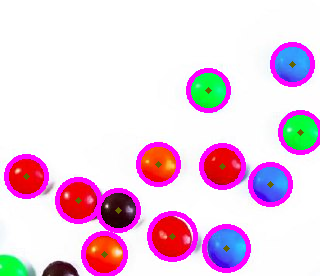

In [9]:

import sys
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
def main(argv):

    default_file = 'smarties.jpg'
    filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    src = cv.imread(default_file, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_circle.py [image_name -- default ' + default_file + '] \n')
        return -1


    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)


    gray = cv.medianBlur(gray, 5)


    rows = gray.shape[0]
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)


    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(src, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv.circle(src, center, radius, (255, 0, 255), 3)


    cv2_imshow(src)
    cv.waitKey(0)

    return 0
if __name__ == "__main__":
    main(sys.argv[1:])

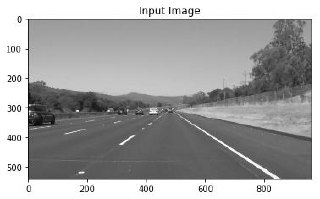

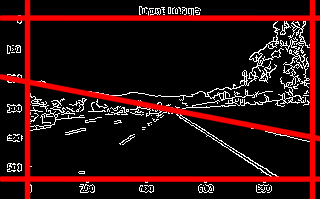

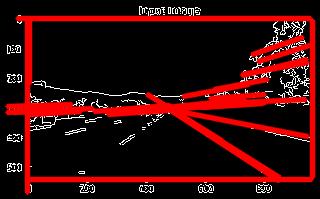

In [10]:
import sys
import math
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
def main(argv):

    # default_file = 'sudoku.png'
    default_file='road.jpg'
    filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    src = cv.imread(default_file, cv.IMREAD_GRAYSCALE)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1


    dst = cv.Canny(src, 50, 200, None, 3)

    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

    cv2_imshow( src)
    cv2_imshow(cdst)
    cv2_imshow(cdstP)

    cv.waitKey()
    return 0

if __name__ == "__main__":
    main(sys.argv[1:])